<a href="https://colab.research.google.com/github/Aniketh78/ML_Models/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/headbrain.csv")
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [ ]:
x = np.array(list(data['Head Size(cm^3)']))
y = np.array(list(data['Brain Weight(grams)']))
x,y

(array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
        3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
        3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
        4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
        3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
        3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
        3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
        3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
        3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
        3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
        3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
        4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
        4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
        3438, 3903, 3899, 3401, 3267, 

In [ ]:
def get_line(x,y):
  x_m,y_m = np.mean(x),np.mean(y) #This is Xi,Yi
  x_d,y_d = x-x_m,y-y_m #This is x,y Bar
  #calculating slope(m)
  m = np.sum(x_d*y_d)/np.sum(x_d**2)
  c= y_m-m*x_m
  print(m,c)
  print(x_m,y_m)
  return  lambda x:x*m+c


In [ ]:
lin = get_line(x,y)


0.2634293394893993 325.5734210494428
3633.9915611814345 1282.873417721519


In [ ]:
X = np.linspace(np.min(x)-100, np.max(x)+100, 1000)
Y = np.array([lin(x) for x in X])
X,Y

(array([2620.        , 2622.22922923, 2624.45845846, 2626.68768769,
        2628.91691692, 2631.14614615, 2633.37537538, 2635.6046046 ,
        2637.83383383, 2640.06306306, 2642.29229229, 2644.52152152,
        2646.75075075, 2648.97997998, 2651.20920921, 2653.43843844,
        2655.66766767, 2657.8968969 , 2660.12612613, 2662.35535536,
        2664.58458458, 2666.81381381, 2669.04304304, 2671.27227227,
        2673.5015015 , 2675.73073073, 2677.95995996, 2680.18918919,
        2682.41841842, 2684.64764765, 2686.87687688, 2689.10610611,
        2691.33533534, 2693.56456456, 2695.79379379, 2698.02302302,
        2700.25225225, 2702.48148148, 2704.71071071, 2706.93993994,
        2709.16916917, 2711.3983984 , 2713.62762763, 2715.85685686,
        2718.08608609, 2720.31531532, 2722.54454454, 2724.77377377,
        2727.003003  , 2729.23223223, 2731.46146146, 2733.69069069,
        2735.91991992, 2738.14914915, 2740.37837838, 2742.60760761,
        2744.83683684, 2747.06606607, 2749.29529

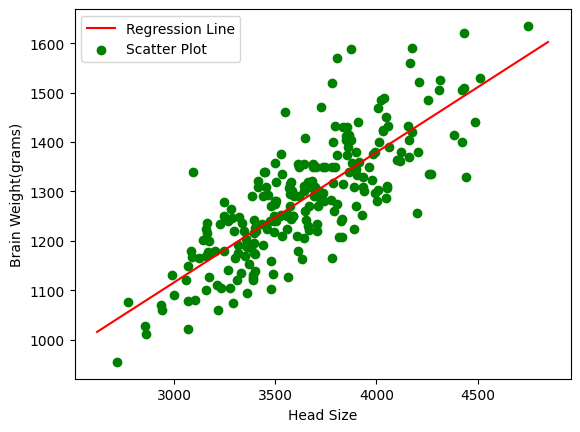

In [ ]:
plt.plot(X,Y,color='red',label = 'Regression Line')
plt.scatter(x,y,color='green',label = 'Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight(grams)")
plt.legend()
plt.show()

In [ ]:
def get_error(line_func, x, y):
    y_m = np.mean(y)
    y_pred = np.array([line_func(_) for _ in x])
    ss_t = np.sum((y - y_m) ** 2)
    ss_r = np.sum((y - y_pred) ** 2)
    return 1 - (ss_r / ss_t)


In [ ]:
get_error(lin, x, y)

0.639311719957

In [ ]:
from sklearn.linear_model import LinearRegression
x = x.reshape((len(x),1))
reg=LinearRegression()
reg=reg.fit(x, y)
print(reg.score(x, y))

0.639311719957


In [ ]:
from sklearn.metrics import r2_score